#### Scipy lectures:
# 3.1. Python para estadística
_Notebook basado en the Scientific Python Lectures:_

_https://lectures.scientific-python.org/packages/scikit-learn/index.html_

_Author: Emmanuelle Gouillart_

_Traducción (chatgpt, google translator, deepl) y adaptación a notebook: Pedro Segura_

Julio 2024

> **Requisitos**
>
> - Entorno científico estándar de Python (NumPy, SciPy, matplotlib)
> - Pandas
> - Statsmodels
> - Seaborn
>
> Para instalar Python y estas dependencias, te recomendamos que descargues Anaconda Python o, preferiblemente, utilices el gestor de paquetes si estás en Ubuntu u otro Linux.


> <span style="color:black; background-color:yellow; padding:2px;">**Ver también**
> 
> - Estadísticas bayesianas en Python: Este capítulo no cubre herramientas para estadísticas bayesianas. De particular interés para la modelación bayesiana está PyMC, que implementa un lenguaje de programación probabilística en Python.
> 
> - Lee un libro de estadística: El libro [Think Stats](https://greenteapress.com/wp/think-stats-2e) está disponible como PDF gratuito o en versión impresa y es una excelente introducción a las estadísticas.

> <span style="color:black; background-color:lightgreen; padding:2px;">**¿Por qué Python para estadística?** R es un lenguaje dedicado a las estadísticas. Python es un lenguaje de propósito general con módulos de estadísticas. R tiene más características de análisis estadístico que Python y sintaxis especializadas. Sin embargo, cuando se trata de construir tuberías de análisis complejas que mezclan estadísticas con, por ejemplo, análisis de imágenes, minería de texto o control de un experimento físico, la riqueza de Python es poderoza.
> </span>

> _Descargo de responsabilidad: Cuestiones de género_
> _Algunos de los ejemplos de este tutorial están centrados en cuestiones de género. La razón es que en tales cuestiones, controlar la veracidad de una afirmación es realmente importante para muchas personas._



### 3.1.1. Representación e interacción de datos
#### 3.1.1.1. Datos como una tabla

El entorno que consideramos para el análisis estadístico es el de múltiples observaciones o muestras descritas por un conjunto de diferentes atributos o características. Los datos pueden verse como una tabla 2D o matriz, con columnas que representan los diferentes atributos de los datos y filas que representan las observaciones. Por ejemplo, los datos contenidos en `examples/brain_size.csv`:


In [2]:
"";"Gender";"FSIQ";"VIQ";"PIQ";"Weight";"Height";"MRI_Count"
"1";"Female";133;132;124;"118";"64.5";816932
"2";"Male";140;150;124;".";"72.5";1001121
"3";"Male";139;123;150;"143";"73.3";1038437
"4";"Male";133;129;128;"172";"68.8";965353
"5";"Female";137;132;134;"147";"65.0";951545

951545

#### 3.1.1.2. El data-frame de pandas
> <span style="color:black; background-color:lightgreen; padding:2px;">Guardaremos y manipularemos estos datos en un [`pandas.DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame), del módulo pandas. Es el equivalente en Python a una tabla de hoja de cálculo. Es diferente de un arreglo 2D de numpy, ya que tiene columnas nombradas, puede contener una mezcla de diferentes tipos de datos por columna y tiene mecanismos elaborados de selección y pivoteo.
> </span>

**Creación de dataframes: lectura de archivos de datos o conversión de arreglos**

> <span style="color:black; background-color:lightyellow; padding:2px;">**Separador:** Es un archivo CSV, pero el separador es “;”
> </span>

**Lectura desde un archivo CSV:** Usando el archivo CSV mencionado que proporciona observaciones del tamaño y peso del cerebro y el IQ (Willerman et al. 1991), los datos son una mezcla de valores numéricos y categóricos:


In [4]:
import pandas
# local
# data = pandas.read_csv('examples/brain_size.csv', sep=';', na_values=".")
data = pandas.read_csv('https://gist.githubusercontent.com/miguelpinia/3d589ad7c4365d2686a79bb7962bba04/raw/5fd04ffe66ef3c762deb81fe689b0730ea84e603/brain_size.csv', sep=';', na_values=".")
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


> <span style="color:white; background-color:red; padding:2px;">**Advertencia,** **Valores faltantes** El peso del segundo individuo falta en el archivo CSV. Si no especificamos el marcador de valor faltante (NA = not available), no podremos realizar análisis estadísticos.
> </span>


**Creación a partir de arreglos:** Un `pandas.DataFrame` también puede verse como un diccionario de 'series' 1D, por ejemplo, arreglos o listas. Si tenemos 3 arreglos numpy:


In [5]:
import numpy as np
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

Podemos presentarlos como un `pandas.DataFrame`:


In [6]:
pandas.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


**Otros tipos de entrada:** pandas puede importar datos desde SQL, archivos de Excel u otros formatos. Consulta la [documentación de pandas](https://pandas.pydata.org/).


**Manipulación de datos**

`data` es un `pandas.DataFrame`, que se asemeja al dataframe de R:


In [10]:
data.shape    # 40 filas y 8 columnas

(40, 8)

In [11]:
data.columns  # Tiene columnas

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [12]:
print(data['Gender'])  # Las columnas pueden ser referenciadas por nombre

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


In [13]:
# Selector más simple
data[data['Gender'] == 'Female']['VIQ'].mean()

109.45

> <span style="color:black; background-color:lightgray; padding:2px;">**Nota** Para una vista rápida de un dataframe grande, utiliza su método describe: [`pandas.DataFrame.describe()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe).
> </span>


**groupby:** dividir un dataframe según los valores de variables categóricas:


In [14]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


`groupby_gender` es un objeto poderoso que expone muchas operaciones sobre el grupo resultante de dataframes:


In [15]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


> <span style="color:black; background-color:lightgreen; padding:2px;">Usa la autocompletación de tab en `groupby_gender` para encontrar más funciones. Otras funciones comunes de agrupación son `median`, `count` (útil para verificar la cantidad de valores faltantes en diferentes subconjuntos) o `sum`. La evaluación de `groupby` es lazy, no se realiza ningún trabajo hasta que se aplica una función de agregación.
> </span>


> <span style="color:black; background-color:lightgray; padding:2px;">**Ejercicio**
> 
> - ¿Cuál es el valor medio de VIQ para toda la población?
> - ¿Cuántos hombres/mujeres fueron incluidos en este estudio?
> - Pista: usa la 'autocompletación de tab' para encontrar los métodos que se pueden llamar, en lugar de 'mean' en el ejemplo anterior.
> - ¿Cuál es el valor medio de los recuentos de MRI expresados en unidades logarítmicas, para hombres y mujeres?
> </span>

> <span style="color:black; background-color:lightgray; padding:2px;">**Nota**
> 
> `groupby_gender.boxplot` se utiliza para los gráficos anteriores (consulta este [ejemplo](https://lectures.scientific-python.org/packages/statistics/auto_examples/plot_pandas.html)).
> </span>

### Graficar datos

Pandas viene con algunas herramientas de graficación (`pandas.plotting`, usando matplotlib en el fondo) para mostrar estadísticas de los datos en dataframes:

![](https://lectures.scientific-python.org/_images/sphx_glr_plot_pandas_001.png)

**Matrices de dispersión:**



array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='MRI_Count', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='MRI_Count', ylabel='Height'>],
       [<Axes: xlabel='Weight', ylabel='MRI_Count'>,
        <Axes: xlabel='Height', ylabel='MRI_Count'>,
        <Axes: xlabel='MRI_Count', ylabel='MRI_Count'>]], dtype=object)

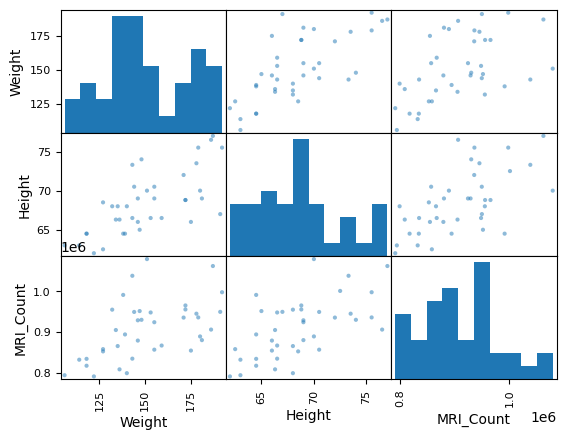

In [16]:
from pandas import plotting
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])

array([[<Axes: xlabel='PIQ', ylabel='PIQ'>,
        <Axes: xlabel='VIQ', ylabel='PIQ'>,
        <Axes: xlabel='FSIQ', ylabel='PIQ'>],
       [<Axes: xlabel='PIQ', ylabel='VIQ'>,
        <Axes: xlabel='VIQ', ylabel='VIQ'>,
        <Axes: xlabel='FSIQ', ylabel='VIQ'>],
       [<Axes: xlabel='PIQ', ylabel='FSIQ'>,
        <Axes: xlabel='VIQ', ylabel='FSIQ'>,
        <Axes: xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

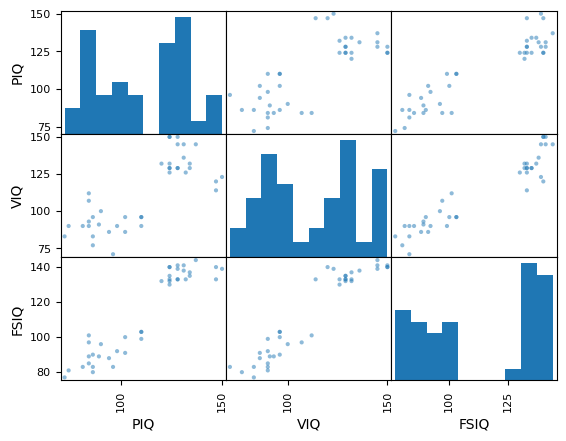

In [17]:
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])

> <span style="color:black; background-color:lightyellow; padding:2px;">**Dos poblaciones** Las métricas de IQ son bimodales, como si hubiera 2 subpoblaciones.
> </span>

> <span style="color:black; background-color:lightgray; padding:2px;">**Ejercicio**
>
> Grafica la matriz de dispersión solo para hombres y solo para mujeres. ¿Crees que las 2 subpoblaciones corresponden al género?
> </span>


### 3.1.2. Pruebas de hipótesis: comparando dos grupos

Para pruebas estadísticas simples, utilizaremos el submódulo `scipy.stats` de SciPy:

> <span style="color:black; background-color:lightyellow; padding:2px;">**Ver también** SciPy es una biblioteca extensa. Para un resumen rápido de toda la biblioteca, consulta el capítulo de [SciPy](https://lectures.scientific-python.org/intro/scipy/index.html#scipy).
> </span>



In [18]:
import scipy as sp

#### 3.1.2.1. Prueba t de Student: la prueba estadística más simple

**Pruebas de una muestra:** probando el valor de la media de una población

[`scipy.stats.ttest_1samp()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp) prueba la hipótesis nula de que la media de la población subyacente a los datos es igual a un valor dado. Devuelve el [estadístico T](https://en.wikipedia.org/wiki/Student%27s_t-test) y el [valor p](https://en.wikipedia.org/wiki/P-value) (consulta la ayuda de la función):


In [19]:
sp.stats.ttest_1samp(data['VIQ'], 0)

TtestResult(statistic=30.08809997084933, pvalue=1.3289196468727879e-28, df=39)

MD: ![](https://lectures.scientific-python.org/_images/two_sided.png)

El valor p de 10^-28 indica que es poco probable observar un valor tan extremo del estadístico bajo la hipótesis nula. Esto puede tomarse como evidencia de que la hipótesis nula es falsa y que la media poblacional de IQ (medida VIQ) no es 0.

Técnicamente, el valor p de la prueba t se deriva bajo el supuesto de que las medias de las muestras tomadas de la población están distribuidas normalmente. Esta condición se satisface exactamente cuando la población en sí misma está distribuida normalmente; sin embargo, debido al teorema del límite central, la condición es casi cierta para muestras razonablemente grandes tomadas de poblaciones que siguen una variedad de distribuciones no normales.

No obstante, si nos preocupa que la violación de los supuestos de normalidad afecte las conclusiones de la prueba, podemos usar una [prueba de rango con signo de Wilcoxon](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test), ?que flexibiliza este supuesto a expensas del poder de la prueba?:


In [20]:
sp.stats.wilcoxon(data['VIQ'])

WilcoxonResult(statistic=0.0, pvalue=1.8189894035458565e-12)

### Prueba t de dos muestras: probando la diferencia entre poblaciones

Hemos visto anteriormente que la media de VIQ en las muestras masculinas y femeninas era diferente. Para probar si esta diferencia es significativa (y sugiere que hay una diferencia en las medias poblacionales), realizamos una prueba t de dos muestras usando [`scipy.stats.ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind):


In [22]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
sp.stats.ttest_ind(female_viq, male_viq)

TtestResult(statistic=-0.7726161723275012, pvalue=0.44452876778583217, df=38.0)

La prueba no paramétrica correspondiente es la [prueba U de Mann–Whitney](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U), [`scipy.stats.mannwhitneyu()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu).

In [23]:
sp.stats.mannwhitneyu(female_viq, male_viq)

MannwhitneyuResult(statistic=164.5, pvalue=0.3422886868727315)

#### 3.1.2.2. Pruebas pareadas: mediciones repetidas en los mismos individuos

PIQ, VIQ y FSIQ proporcionan tres medidas de IQ. Probemos si FSIQ y PIQ son significativamente diferentes. Podemos usar una prueba de "muestra independiente":

![](https://lectures.scientific-python.org/_images/sphx_glr_plot_paired_boxplots_001.png)

In [24]:
sp.stats.ttest_ind(data['FSIQ'], data['PIQ'])

TtestResult(statistic=0.465637596380964, pvalue=0.6427725009414841, df=78.0)

El problema con este enfoque es que ignora una relación importante entre las observaciones: FSIQ y PIQ se miden en los mismos individuos. Por lo tanto, la variabilidad debida a la variabilidad entre sujetos es un factor de confusión, reduciendo el poder de la prueba. Esta variabilidad puede eliminarse usando una prueba pareada o prueba de ["medidas repetidas"](https://en.wikipedia.org/wiki/Repeated_measures_design):


In [25]:
sp.stats.ttest_rel(data['FSIQ'], data['PIQ'])

TtestResult(statistic=1.7842019405859857, pvalue=0.08217263818364236, df=39)

Esto es equivalente a una prueba de una muestra sobre las diferencias entre observaciones pareadas:

Esto es equivalente a una prueba de una muestra sobre las diferencias entre observaciones pareadas:

MD: ![](https://lectures.scientific-python.org/_images/sphx_glr_plot_paired_boxplots_002.png)

In [26]:
sp.stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

TtestResult(statistic=1.7842019405859857, pvalue=0.08217263818364236, df=39)

De acuerdo con esto, podemos realizar una versión no paramétrica de la prueba con Wilcoxon.

In [27]:
sp.stats.wilcoxon(data['FSIQ'], data['PIQ'], method="approx")

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

> <span style="color:black; background-color:lightgray; padding:2px;">**Ejercicio**
>
> - Prueba la diferencia entre los pesos de hombres y mujeres.
> - Usa estadísticas no paramétricas para probar la diferencia entre VIQ en hombres y mujeres.
>
> **Conclusión:** encontramos que los datos no apoyan la hipótesis de que los hombres y las mujeres tienen diferentes VIQ.
> </span>

### 3.1.3. Modelos lineales, factores múltiples y análisis de varianza

#### 3.1.3.1. "Fórmulas" para especificar modelos estadísticos en Python

**Una regresión lineal simple**

Dado dos conjuntos de observaciones, x e y, queremos probar la hipótesis de que y es una función lineal de x. En otros términos:

    y = x * coef + intercept + e

donde e es el ruido de la observación. Usaremos el módulo `statsmodels` para:

- Ajustar un modelo lineal. Utilizaremos la estrategia más simple, mínimos cuadrados ordinarios (OLS).
- Probar que el coeficiente es diferente de cero.

MD: ![](https://lectures.scientific-python.org/_images/sphx_glr_plot_regression_001.png)

Primero, generamos datos simulados según el modelo:


In [28]:
import numpy as np
x = np.linspace(-5, 5, 20)
rng = np.random.default_rng(27446968)
# normal distributed noise
y = -5 + 3*x + 4 * rng.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pandas.DataFrame({'x': x, 'y': y})

> <span style="color:black; background-color:lightyellow; padding:2px;">**"Fórmulas" para estadísticas en Python**
>
> Consulta la [documentación de statsmodels](https://www.statsmodels.org/stable/example_formulas.html)
> </span>

Luego especificamos un modelo OLS y lo ajustamos:

In [31]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit()

Podemos inspeccionar las diversas estadísticas derivadas del ajuste:


In [32]:
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     164.5
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           1.72e-10
Time:                        18:30:39   Log-Likelihood:                -51.758
No. Observations:                  20   AIC:                             107.5
Df Residuals:                      18   BIC:                             109.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2948      0.759     -5.661      0.0

> <span style="color:black; background-color:lightgray; padding:2px;">**Terminología:** Statsmodels usa una terminología estadística: la variable "_y_" en statsmodels se llama ‘endógena’, mientras que la variable "_x_" se llama exógena. Esto se discute con más detalle [aquí](https://www.statsmodels.org/stable/example_formulas.html).
> Para simplificar, y (endógena) es el valor que estás tratando de predecir, mientras que x (exógena) representa las características que estás usando para hacer la predicción.
> </span>

> <span style="color:black; background-color:lightgray; padding:2px;">**Ejercicio**
>
> Recupera los parámetros estimados del modelo anterior. Pista: usa la autocompletación de tab para encontrar el atributo relevante.
> </span>

### Variables categóricas: comparando grupos o múltiples categorías

Volvamos a los datos sobre el tamaño del cerebro:



In [36]:
#data = pandas.read_csv('examples/brain_size.csv', sep=';', na_values=".")
data = pandas.read_csv('https://gist.githubusercontent.com/miguelpinia/3d589ad7c4365d2686a79bb7962bba04/raw/5fd04ffe66ef3c762deb81fe689b0730ea84e603/brain_size.csv', sep=';', na_values=".")


Podemos escribir una comparación entre el IQ de hombres y mujeres usando un modelo lineal:

In [37]:
model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Tue, 02 Jul 2024   Prob (F-statistic):              0.445
Time:                        18:34:59   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

> <span style="color:black; background-color:lightgray; padding:2px;">**Consejos para especificar el modelo:** **Forzar categórico:** El 'Género' es automáticamente detectado como una variable categórica y, por lo tanto, cada uno de sus diferentes valores se trata como entidades diferentes.
> Una columna de enteros puede ser forzada a tratarse como categórica usando:
> > </span>
> model = ols('VIQ ~ C(Gender)', data).fit()

> <span style="color:black; background-color:lightgray; padding:2px;">**Intercepto:** Podemos eliminar el intercepto usando `- 1` en la fórmula, o forzar el uso de un intercepto usando `+ 1`.
> </span>
> <span style="color:black; background-color:lightgreen; padding:2px;">Por defecto, statsmodels trata una variable categórica con K valores posibles como K-1 variables booleanas ‘dummy’ (el último nivel se absorbe en el término de intercepto). Esta es casi siempre una buena opción predeterminada; sin embargo, es posible especificar diferentes codificaciones para variables categóricas ([más información](https://www.statsmodels.org/devel/contrasts.html)).
> </span>



> <span style="color:black; background-color:lightgray; padding:2px;">**Enlace a pruebas t entre diferentes FSIQ y PIQ** Para comparar diferentes tipos de IQ, necesitamos crear una tabla de "formato largo", listando los IQs, donde el tipo de IQ está indicado por una variable categórica:
> </span>


In [39]:
data_fisq = pandas.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pandas.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pandas.concat((data_fisq, data_piq))
print(data_long)
model = ols("iq ~ type", data_long).fit()
print(model.summary()) 

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
..  ...   ...
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Tue, 02 Jul 2024   Prob (F-statistic):              0.643
Time:                        19:32:01   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  c

> <span style="color:black; background-color:lightgray; padding:2px;">Podemos ver que recuperamos los mismos valores para la prueba t y los valores p correspondientes para el efecto del tipo de IQ que en la prueba t anterior:
> </span>


In [40]:
sp.stats.ttest_ind(data['FSIQ'], data['PIQ'])

TtestResult(statistic=0.465637596380964, pvalue=0.6427725009414841, df=78.0)

#### 3.1.3.2. Regresión múltiple: incluyendo múltiples factores

Consideremos un modelo lineal que explica una variable z (la variable dependiente) con 2 variables x e y:

    z = x * c_1 + y * c_2 + i + e
![](https://lectures.scientific-python.org/_images/sphx_glr_plot_regression_3d_001.png)
Tal modelo puede verse en 3D como un ajuste de un plano a una nube de puntos (x, y, z).

**Ejemplo:** los datos de iris ([examples/iris.csv](https://lectures.scientific-python.org/_downloads/6c4b367d8ba9371e9254c70abb7496c5/iris.csv))


> <span style="color:black; background-color:lightgreen; padding:2px;">**El tamaño del sépalo y el pétalo tienden a estar relacionados: ¡las flores más grandes son más grandes! Pero, ¿hay además un efecto sistemático de la especie?**
> </span>

![](https://lectures.scientific-python.org/_images/sphx_glr_plot_iris_analysis_001.png)


In [50]:
#data = pandas.read_csv('examples/iris.csv')
data = pandas.read_csv('https://lectures.scientific-python.org/_downloads/6c4b367d8ba9371e9254c70abb7496c5/iris.csv')
model = ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           1.58e-20
Time:                        19:49:08   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

#### 3.1.3.3. Pruebas de hipótesis post-hoc: análisis de varianza (ANOVA)

En el ejemplo anterior de iris, deseamos probar si la longitud del pétalo es diferente entre versicolor y virginica, después de eliminar el efecto del ancho del sépalo. Esto se puede formular como la prueba de la diferencia entre el coeficiente asociado a versicolor y virginica en el modelo lineal estimado anteriormente (es un Análisis de Varianza, ANOVA). Para esto, escribimos un vector de 'contraste' en los parámetros estimados: queremos probar "name T.versicolor - name T.virginica", con una prueba [F](https://en.wikipedia.org/wiki/F-test):


In [51]:
print(model.f_test([0, 1, -1, 0]))

<F test: F=3.245335346574177, p=0.07369058781701142, df_denom=146, df_num=1>


### 3.1.4. Más visualización: seaborn para la exploración estadística

[Seaborn](https://seaborn.pydata.org/) combina ajustes estadísticos simples con gráficos en dataframes de pandas.

Consideremos datos que proporcionan salarios y mucha otra información personal sobre 500 individuos (Berndt, ER. The Practice of Econometrics. 1991. NY: Addison-Wesley [fuente](https://lib.stat.cmu.edu/datasets/CPS_85_Wages)).

> <span style="color:black; background-color:lightgreen; padding:2px;">**El código completo para cargar y graficar los datos de salarios se encuentra en el [ejemplo correspondiente](https://lectures.scientific-python.org/packages/statistics/auto_examples/plot_wage_data.html).**
> </span>


In [53]:
import pandas
import requests
import os

if not os.path.exists("wages.txt"):
    # Download the file if it is not present
    r = requests.get("http://lib.stat.cmu.edu/datasets/CPS_85_Wages")
    with open("wages.txt", "wb") as f:
        f.write(r.content)

# Give names to the columns
names = [
    "EDUCATION: Number of years of education",
    "SOUTH: 1=Person lives in South, 0=Person lives elsewhere",
    "SEX: 1=Female, 0=Male",
    "EXPERIENCE: Number of years of work experience",
    "UNION: 1=Union member, 0=Not union member",
    "WAGE: Wage (dollars per hour)",
    "AGE: years",
    "RACE: 1=Other, 2=Hispanic, 3=White",
    "OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other",
    "SECTOR: 0=Other, 1=Manufacturing, 2=Construction",
    "MARR: 0=Unmarried,  1=Married",
]

short_names = [n.split(":")[0] for n in names]

data = pandas.read_csv(
    "wages.txt", skiprows=27, skipfooter=6, sep=None, header=None, engine="python"
)
data.columns = short_names

# Log-transform the wages, because they typically are increased with
# multiplicative factors
import numpy as np

data["WAGE"] = np.log10(data["WAGE"])


In [54]:
print(data)  

     EDUCATION  SOUTH  SEX  EXPERIENCE  UNION      WAGE  AGE  RACE  \
0            8      0    1          21      0  0.707570   35     2   
1            9      0    1          42      0  0.694605   57     3   
2           12      0    0           1      0  0.824126   19     3   
3           12      0    0           4      0  0.602060   22     3   
4           12      0    0          17      0  0.875061   35     3   
..         ...    ...  ...         ...    ...       ...  ...   ...   
529         18      0    0           5      0  1.055378   29     3   
530         12      0    1          33      0  0.785330   51     1   
531         17      0    1          25      1  1.366423   48     1   
532         12      1    0          13      1  1.298416   31     3   
533         16      0    0          33      0  1.186956   55     3   

     OCCUPATION  SECTOR  MARR  
0             6       1     1  
1             6       1     1  
2             6       1     0  
3             6       0     0  

#### 3.1.4.1. Pairplot: matrices de dispersión

Podemos obtener fácilmente una intuición sobre las interacciones entre variables continuas usando [`seaborn.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot) para mostrar una matriz de dispersión:


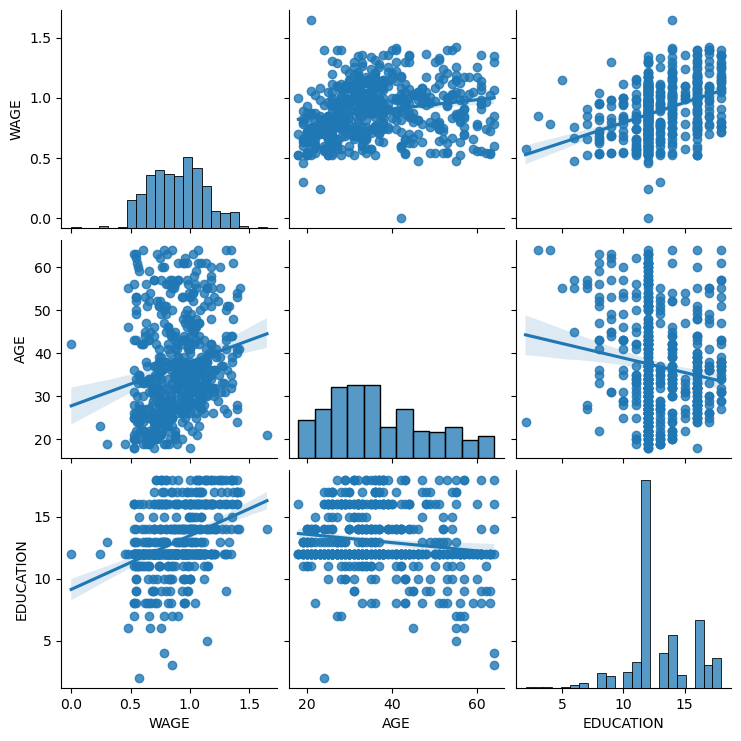

In [55]:
import seaborn
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],kind='reg')  

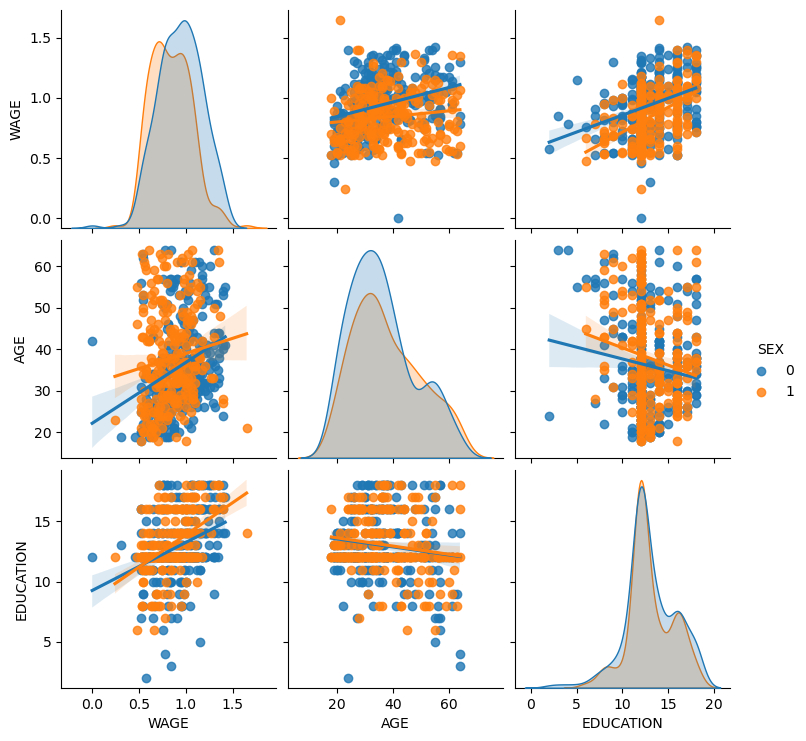

In [56]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg', hue='SEX')  

### Apariencia y configuraciones de matplotlib

Seaborn cambia los valores predeterminados de las figuras de matplotlib para lograr una apariencia más "moderna", similar a "Excel". Lo hace al importar. Puedes restablecer los valores predeterminados utilizando:


In [57]:
import matplotlib.pyplot as plt
plt.rcdefaults()

### Apariencia y configuraciones de matplotlib

Seaborn cambia los valores predeterminados de las figuras de matplotlib para lograr una apariencia más "moderna", similar a "Excel". Lo hace al importar. Puedes restablecer los valores predeterminados utilizando:

> **Nota:** Para volver a la configuración de seaborn, o entender mejor el estilo en seaborn, consulta la sección relevante de la [documentación de seaborn](https://seaborn.pydata.org/tutorial/aesthetics.html).


### 3.1.4.2. lmplot: graficando una regresión univariada

Una regresión que captura la relación entre una variable y otra, por ejemplo, salario y educación, se puede graficar utilizando (`seaborn.lmplot()`)[https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot] :


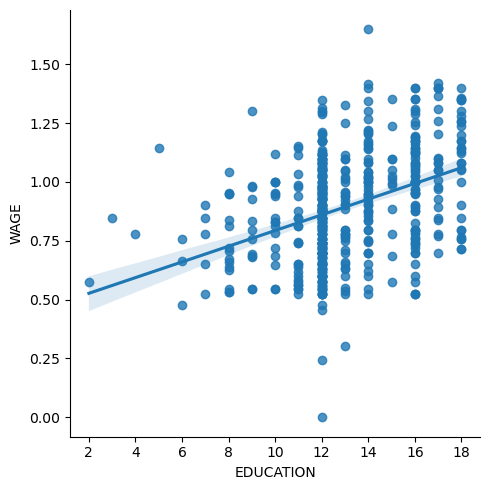

In [58]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data)  

### Regresión robusta

> **Nota:** Dado que, en el gráfico anterior, parece haber un par de puntos de datos que están fuera de la nube principal a la derecha, podrían ser valores atípicos, no representativos de la población, pero que están afectando la regresión.

Para calcular una regresión que sea menos sensible a los valores atípicos, se debe usar un modelo robusto. Esto se hace en seaborn usando `robust=True` en las funciones de graficación, o en statsmodels reemplazando el uso de OLS por un "Modelo Lineal Robusto", `statsmodels.formula.api.rlm()` [https://www.statsmodels.org/stable/generated/statsmodels.formula.api.rlm.html#statsmodels.formula.api.rlm].


### 3.1.5. Probando interacciones
![](https://lectures.scientific-python.org/_images/sphx_glr_plot_wage_education_gender_001.png)

¿Los salarios aumentan más con la educación para los hombres que para las mujeres?

> <span style="color:black; background-color:lightgreen; padding:2px;">
> El gráfico anterior está compuesto por dos ajustes diferentes. Necesitamos formular un único modelo que pruebe una variación de la pendiente entre las dos poblaciones. Esto se hace a través de una [interaccion](https://www.statsmodels.org/devel/example_formulas.html#multiplicative-interactions).
> </span>


In [66]:
data

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,0,1,21,0,0.707570,35,2,6,1,1
1,9,0,1,42,0,0.694605,57,3,6,1,1
2,12,0,0,1,0,0.824126,19,3,6,1,0
3,12,0,0,4,0,0.602060,22,3,6,0,0
4,12,0,0,17,0,0.875061,35,3,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...
529,18,0,0,5,0,1.055378,29,3,5,0,0
530,12,0,1,33,0,0.785330,51,1,5,0,1
531,17,0,1,25,1,1.366423,48,1,5,0,1
532,12,1,0,13,1,1.298416,31,3,5,0,1


In [68]:
#import statsmodels.api as sm
from statsmodels.formula.api import ols

result = ols(formula='WAGE ~ EDUCATION + SEX + EDUCATION * SEX',
                data=data).fit()    
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           2.94e-25
Time:                        20:04:24   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5748      0.058      9.861

¿Podemos concluir que la educación beneficia más a los hombres que a las mujeres?


> <span style="color:black; background-color:lightgrey; padding:2px;">**Mensajes clave**
> - Las pruebas de hipótesis y los valores p te dan la significancia de un efecto o diferencia.
> - Las fórmulas (con variables categóricas) te permiten expresar enlaces ricos en tus datos.
> - Visualizar tus datos y ajustar modelos simples te da una visión más clara de los datos.
> - El condicionamiento (agregar factores que pueden explicar toda o parte de la variación) es un aspecto importante del modelado que cambia la interpretación.
> </span>


https://lectures.scientific-python.org/packages/statistics/index.html